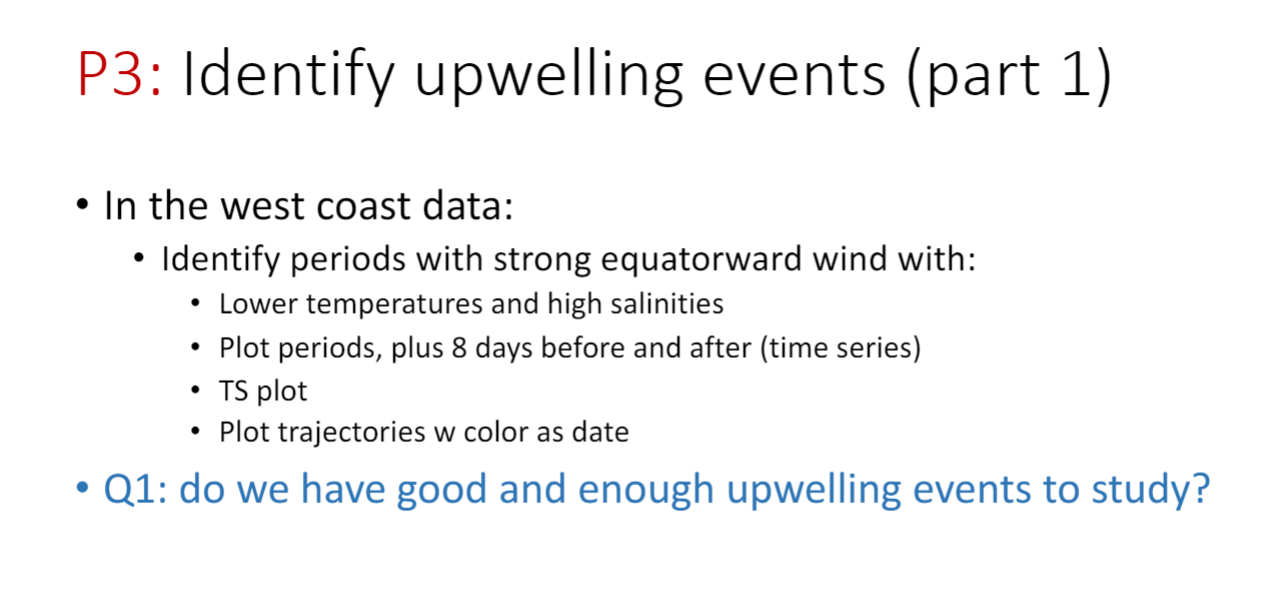

In [1]:
# import necessary packages
import numpy as np
import matplotlib.dates as mdates
import warnings
import matplotlib.pyplot as plt


warnings.simplefilter('ignore')

# load custom packages
from trajectory_plot import trajectory_plot
from compile_function import Compile_Datasets

In [2]:
def westcoast(upperLat, lowerLat):

    #upperLat: Upper acceptable latitude
    #lowerLat: Lower acceptable latitude
    # -function will discard all data not between upperLat and lowerLat


    ds = Compile_Datasets("all")


    #Removes data that is not within 300 km of shore

    #add ds = ds.where
    ds1 = ds.where(ds.dist_land <= 300)

    #Removes SF bay data
    ds1 = ds1.where(~(((ds1.lon > -122.5938) & (ds1.lat > 37.72783)) & ((ds1.lon < -122.2506620424831) & (ds1.lat < 38.094658646550556))) | ~(((ds1.lon > -122.38678630116495) & (ds1.lat > 37.430464705762226)) & ((ds1.lon < -121.99799777841487) & (ds1.lat < 37.81408437558721))))

    #Removes Data not between upperLat and lowerLat
    ds1 = ds1.where((ds1.lat > lowerLat) & (ds1.lat < upperLat))

    return(ds1)

In [3]:
# fn_list1 = ['saildrone_west_coast_survey_2018_sd1026_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
#             'saildrone_west_coast_survey_2019_sd1047_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
#             'saildrone_west_coast_survey_2019_sd1043_JPLv5.0_8dy_20210613norep_20210613_20211116.nc']
# print(type(fn_list1))
# sail = Compile_Datasets(fn_list1)

# sail = westcoast(50, 20) # All westcoast voyages are within this range.

sail = Compile_Datasets("all", -135, -104, 17, 49)

# TODO: lat 34 to 42  (west coast only)

sail = sail.where((sail["lon"].values != np.nan) | (sail["lat"].values != np.nan) |
                  (sail["SAL_CTD_MEAN"] != np.nan) | (sail["TEMP_CTD_MEAN"] != np.nan) |
                  (sail["Delta_SAL_CTD_MEAN"] != np.nan) | (sail["Delta_TEMP_CTD_MEAN"] != np.nan), drop = True)

# print(np.nan in list(sail["lon"].values))
# print(np.nan in list(sail["lat"].values))
# print(np.nan in list(sail["SAL_CTD_MEAN"]))
# print(np.nan in list(sail["TEMP_CTD_MEAN"]))
# print(np.nan in list(sail["Delta_SAL_CTD_MEAN"]))
# print(np.nan in list(sail["Delta_TEMP_CTD_MEAN"]))

In [4]:

VWND_MEAN_STDEV_Weight = -3
Delta_TEMP_CTD_MEAN_STDEV_Weight = 1
Delta_SAL_CTD_MEAN_STDEV_Weight = 1


sail["upwelling"] = ((sail.VWND_MEAN * VWND_MEAN_STDEV_Weight) + (sail.Delta_TEMP_CTD_MEAN * Delta_TEMP_CTD_MEAN_STDEV_Weight) +
                            (sail.Delta_SAL_CTD_MEAN * Delta_SAL_CTD_MEAN_STDEV_Weight))


# reformat dates
sail['date'] = mdates.date2num(sail['time'].dt.date)

# ask what variable should be plotted
print([i for i in sail.data_vars])


['lat', 'lon', 'TEMP_AIR_MEAN', 'RH_MEAN', 'BARO_PRES_MEAN', 'SAL_CTD_MEAN', 'TEMP_CTD_MEAN', 'TEMP_CTD_STDDEV', 'CDOM_MEAN', 'CHLOR_MEAN', 'PAR_AIR_MEAN', 'GUST_WND_MEAN', 'UWND_MEAN', 'VWND_MEAN', 'SOG_MEAN', 'COG_MEAN', 'HDG_MEAN', 'ROLL_MEAN', 'PITCH_MEAN', 'WWND_MEAN', 'TEMP_RBR_MEAN', 'SAL_RBR_MEAN', 'TEMP_O2_RBR_MEAN', 'CHLOR_WETLABS_MEAN', 'WIND_MEASUREMENT_HEIGHT_MEAN', 'sat_smap_sss', 'sat_anc_sss', 'sat_anc_sst', 'sat_smap_spd', 'sat_smap_high_spd', 'sat_weight', 'sat_land_fraction', 'sat_ice_fraction', 'sat_smap_sss_uncertainty', 'sat_lat', 'sat_lon', 'dist_land', 'analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction', 'relativeID', 'realID', 'duration', 'Delta_TEMP_CTD_MEAN', 'Delta_SAL_CTD_MEAN', 'Delta_TEMP_CTD_MEAN_STDEV', 'Delta_SAL_CTD_MEAN_STDEV', 'VWND_MEAN_STDEV', 'upwelling']


dataset['lat'].values: [nan nan nan ... nan nan nan]
latr: [nan, nan]
lonr: [nan, nan]
[[nan nan]
 [nan nan]]


ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=[-180.0, 180.0], y_limits=[-90.0, 90.0]).

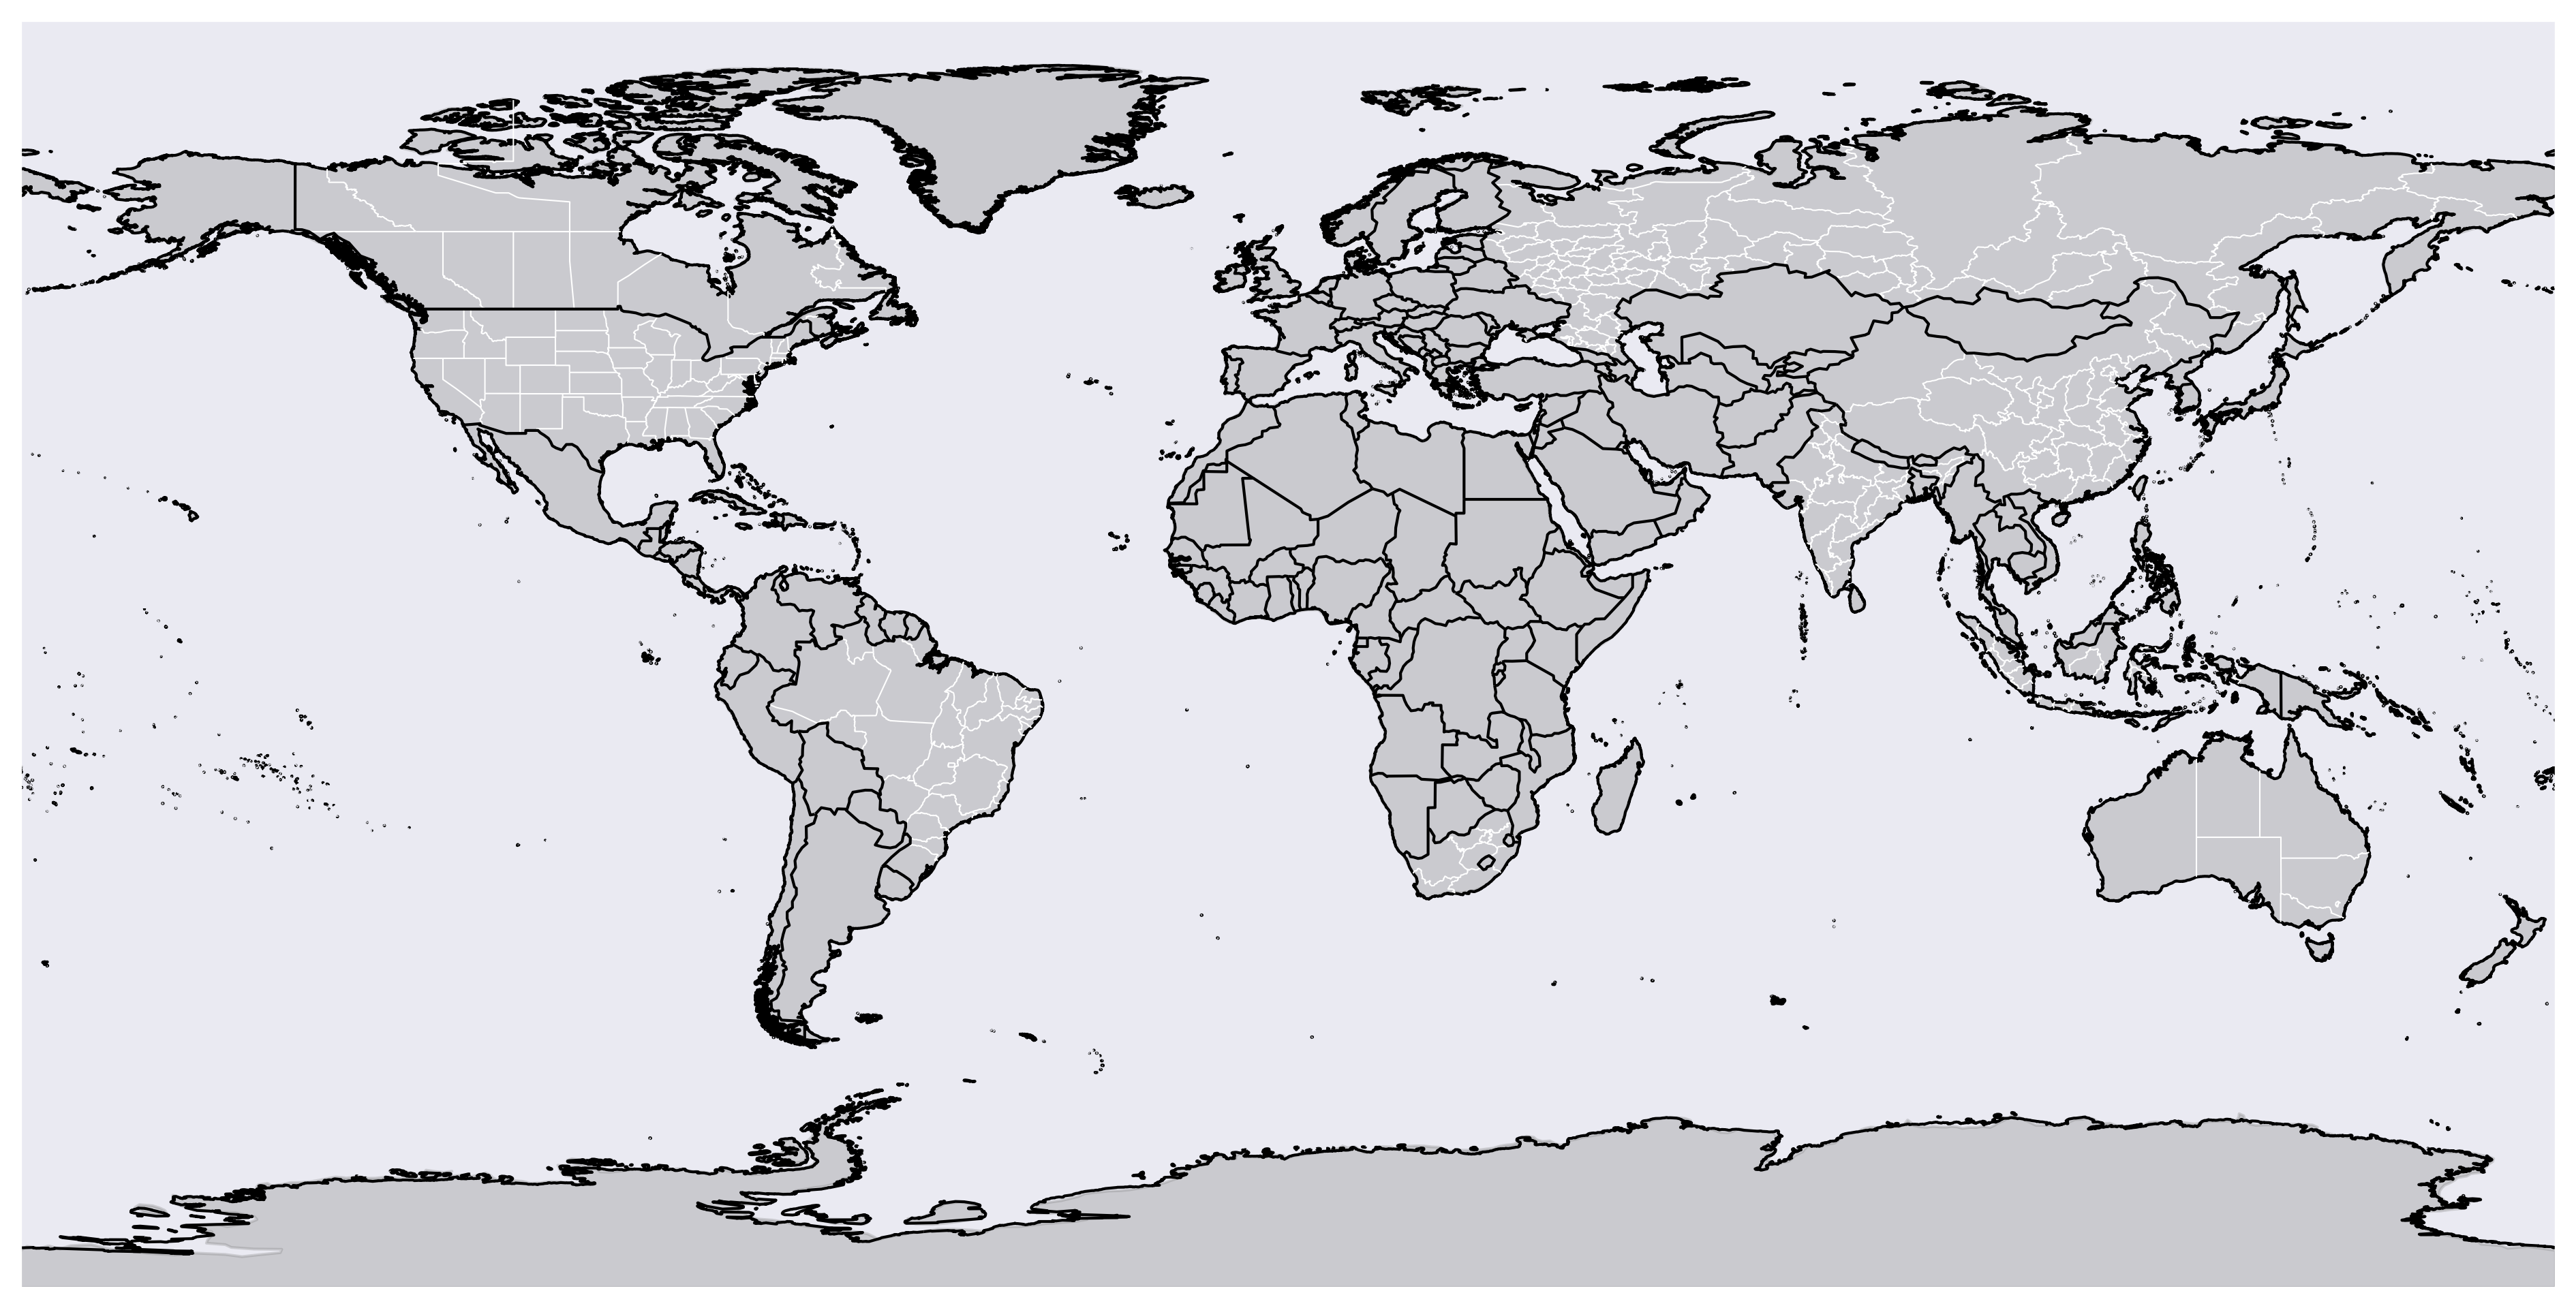

In [5]:
# var_to_plot=input('what variable should be plotted:')
var_to_plot = "Delta_TEMP_CTD_MEAN_STDEV"

# plt.scatter(x=sail['lon'], y=sail['lat'], c=sail[var_to_plot], cmap='jet')

trajectory_plot(sail, var_to_plot)

# TODO:
# different symbols for suspected upwelling points
# x: time
# Y: wind
# C: delta T or Temp



# initialize variables and objects
fig = plt.figure(figsize=(20,10), dpi = 300)
ax = plt.axes()
# plot the data
pl_obj = plt.scatter(x =sail["time"], y =sail['VWND_MEAN'], c = sail['Delta_TEMP_CTD_MEAN'], cmap='jet', vmin = 0, vmax = 365) #
# Add the colorbar
clb = fig.colorbar(pl_obj, ticks=range(0,365,10))
clb.ax.set_title("day of year")
# Label and add tick marks to the axes
ax.set(xlim=(-1, max(sail["saildrone"])+1), xticks=np.arange(-1, max(sail["relativeID"]))+1,
       ylim=(min(sail['VWND_MEAN']), max(sail['VWND_MEAN'])), yticks=np.arange(min(sail['VWND_MEAN']), max(sail['VWND_MEAN'])))
ax.set_ylabel("year")
ax.set_xlabel("relative IDs")



# title the graph
plt.title('When are cruise', fontdict = {'fontsize' : 16})
# save the plot as a png
plt.savefig('Saved Graphs/When are cruise.png')
# show and clear the plt object
plt.show()